<a href="https://colab.research.google.com/github/DadvaiahPavan/FraudDetection/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Import the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy


In [ ]:
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
# Cell 3: Dataset exploring

print(data.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
# Cell 4: Print the shape of the data

data = data.sample(frac=0.1, random_state=1)
print(data.shape)
print(data.describe())


(2584, 31)
               Time           V1           V2           V3           V4  \
count   2584.000000  2584.000000  2584.000000  2584.000000  2584.000000   
mean   19470.167957    -0.216214     0.131692     0.780771     0.227037   
std    11665.477603     1.826520     1.413644     1.556341     1.412678   
min        1.000000   -26.619952   -13.144695   -27.747084    -4.826127   
25%     7768.500000    -0.945405    -0.429332     0.290842    -0.695608   
50%    22944.000000    -0.257453     0.171236     0.862748     0.201841   
75%    30294.500000     1.166227     0.783008     1.530076     1.110730   
max    33782.000000     1.622188    14.845545     3.934998     7.426940   

                V5           V6           V7           V8           V9  ...  \
count  2584.000000  2584.000000  2584.000000  2584.000000  2584.000000  ...   
mean     -0.216961     0.104509    -0.124877     0.031421     0.430043  ...   
std       1.387360     1.349353     1.284752     1.509413     1.270347  ... 

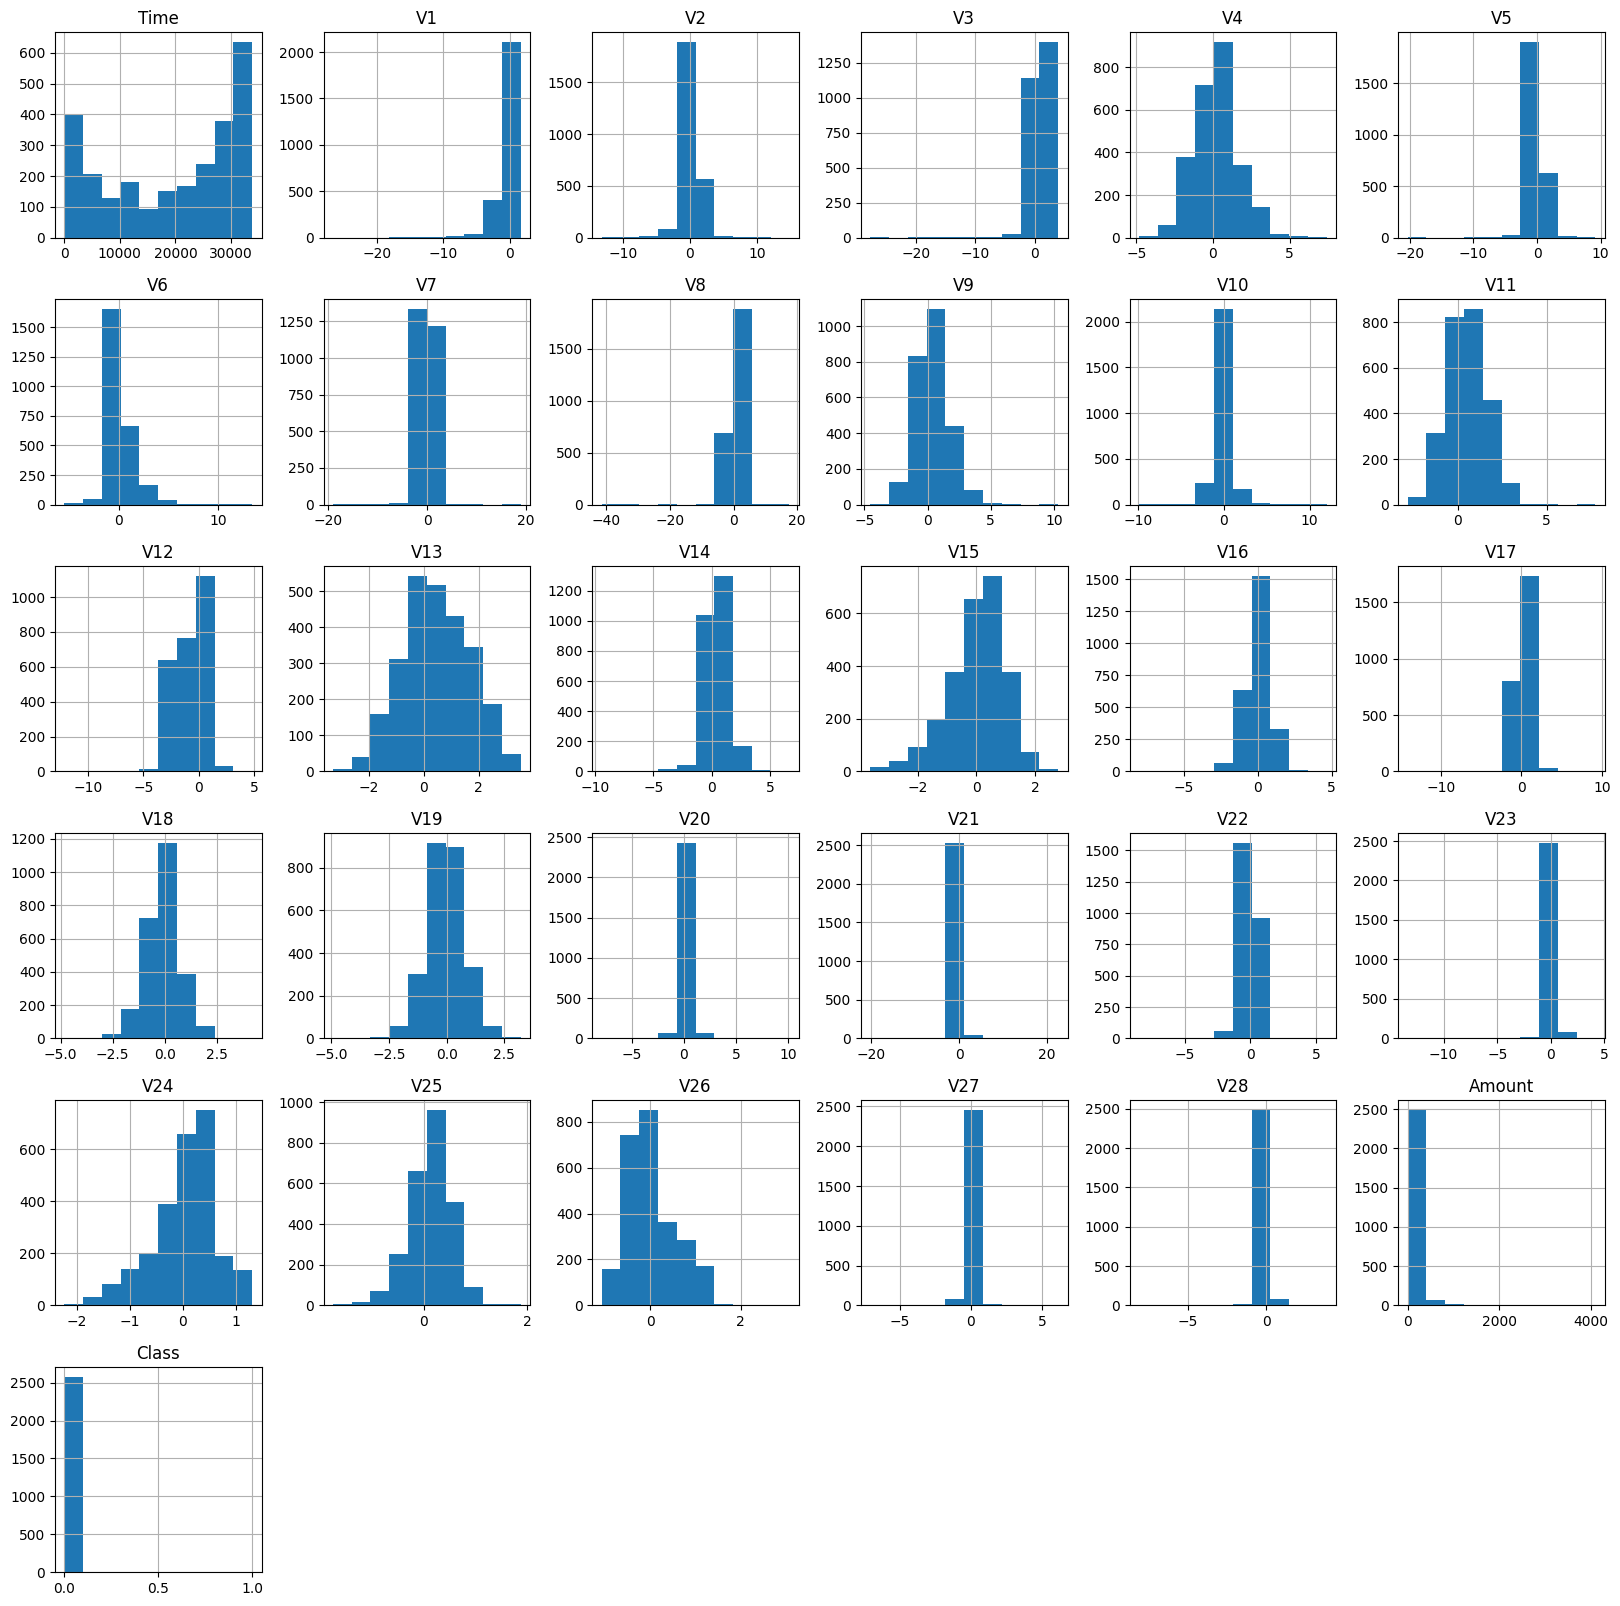

In [ ]:
# Cell 5: Plot histograms of each parameter

data.hist(figsize=(20, 20))
plt.show()


In [ ]:
# Cell 6: Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0023273855702094647
Fraud Cases: 6
Valid Transactions: 2578


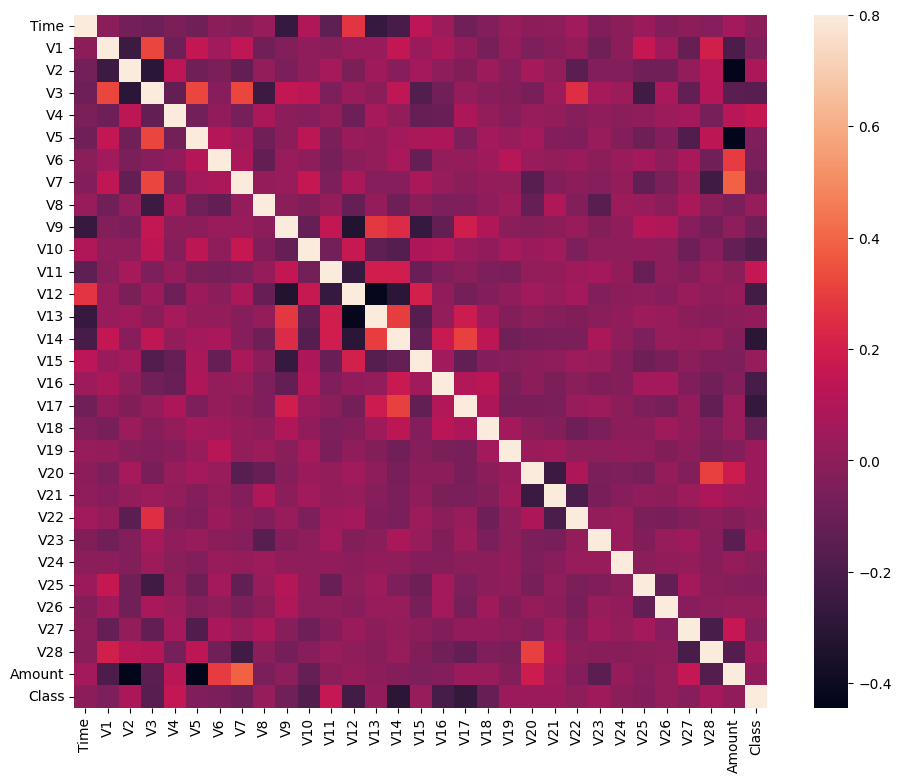

In [ ]:
# Cell 7: Correlation matrix

corrmat = data.corr()
fig = plt.figure(figsize=(12, 9))

sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()


In [ ]:
# Cell 8: Get all the columns from the dataFrame

columns = data.columns.tolist()


In [ ]:
# Cell 9: Filter the columns to remove data we do not want

columns = [c for c in columns if c not in ["Class"]]


In [ ]:
# Cell 10: Store the variable we'll be predicting on

target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)


(2584, 30)
(2584,)


In [ ]:
# Cell 11: Import necessary packages

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


In [ ]:
# Cell 12: Define random states

state = 1


In [ ]:
# Cell 13: Define outlier detection tools to be compared

classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)
}


In [ ]:
# Cell 14: Run outlier detection and classification metrics

plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):

    # Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshape the prediction values to 0 for valid, 1 for fraud.
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()

    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 13
0.9949690402476781
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2578
         1.0       0.00      0.00      0.00         6

    accuracy                           0.99      2584
   macro avg       0.50      0.50      0.50      2584
weighted avg       1.00      0.99      1.00      2584

Local Outlier Factor: 13
0.9949690402476781
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2578
         1.0       0.00      0.00      0.00         6

    accuracy                           0.99      2584
   macro avg       0.50      0.50      0.50      2584
weighted avg       1.00      0.99      1.00      2584



<Figure size 900x700 with 0 Axes>